# المعالجات القبلية
في هذه التجربة نقارن بين بعض أدوات التجذيع المستخدمة للغة العربية.
نناقش:
1- طريقة الاستخدام
2- السرعة
3- الكفاءة

In [1]:
import sys
sys.path.append('/mnt/5e85af0b-fa6b-4dca-a539-449bff7060b4/Courses/NLP/resources/other/arabic-sentiment-analysis-master/')

In [95]:
from farasa.segmenter import FarasaSegmenter
from farasa.stemmer import FarasaStemmer
import re
import elements
import string
import emoji
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /home/amr/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

نقوم بتحميل بتحميل مسبعدات الفهرسة من مكتبة NLTK.

In [96]:
arb_stopwords = set(nltk.corpus.stopwords.words("arabic"))

In [120]:
txt = '   أحتاج أن أري   الكًَثـــير. من الأشيــــاء    @و , '

تقوم الدوالّ التالية بإزالة التشكيل و التطويل و مستبعدات الفهرسة و المسافات المتتالية و المسافات أول الجمل و تحول التفاعلات (emoji) لأوصاف مكتوبة

In [121]:
def tashkel_removal(t):
    return t.translate(t.maketrans('',"",''.join(elements.DIACRITICS)))

In [122]:
def tatweel_removal(t):
    return re.sub('ـ+', '',t)

In [123]:
def normalization(t):
    return t.translate(t.maketrans(''.join(elements.ALEF_HAMZA_FORMS+elements.NON_ALIF_HAMZA_FORMS),"اااوي"))

In [124]:
def stopwords_removal(t,stop=arb_stopwords):
    return ' '.join([word for word in t.split() if word not in stop])

In [125]:
def successive_space_removal(t):
    t=t.strip()
    return re.sub(' +', ' ',t)

In [126]:
def punctuation_removal(t):
    return t.translate(t.maketrans('',"",''.join(elements.PUNCTUATION_MARKS[:-1])+'?'))

In [127]:
def emojify(t):
    return emoji.demojize(t)

اختبار
يمكن استبدا ل معظم الدوال, بدوال من مكتبة pyarabic.

In [128]:
pipeline = [stopwords_removal,tashkel_removal,tatweel_removal,punctuation_removal,
        normalization,emojify,successive_space_removal]

In [129]:
pipeline_stages = str('stopwords_removal,tashkel_removal,tatweel_removal,punctuation_removal,normalization,emojify,successive_space_removal').split(',')

هذه الخطة لحفظ النص دون معالجة قبلية

In [130]:
import copy
src_txt = copy.copy(txt)

مراحل التغيير بعد كل دالّة
يمكن استخدام مكتبات جاهزة لعمل نفس الوظيفة

In [131]:
for method,name in zip(pipeline,pipeline_stages):
    txt= method(txt)
    print(name,' --> ',txt)

stopwords_removal  -->  أحتاج أري الكًَثـــير. الأشيــــاء @و ,
tashkel_removal  -->  أحتاج أري الكثـــير. الأشيــــاء @و ,
tatweel_removal  -->  أحتاج أري الكثير. الأشياء @و ,
punctuation_removal  -->  أحتاج أري الكثير الأشياء و 
normalization  -->  احتاج اري الكثير الاشياء و 
emojify  -->  احتاج اري الكثير الاشياء و 
successive_space_removal  -->  احتاج اري الكثير الاشياء و


In [132]:
txt

'احتاج اري الكثير الاشياء و'

In [133]:
src_txt

'   أحتاج أن أري   الكًَثـــير. من الأشيــــاء    @و , '

### أدوات التجذيع

تجربة مبدئية لكيفية عمل كل أداة تجذيع

In [134]:
def stemmer(t, stemming_function):
    return stemming_function(t)

##### فراسة farasa

In [135]:
frasa_stmmer = FarasaStemmer()

In [136]:
frasa_stmmer.stem(txt)

'احتاج آري كثير شيء و'

In [137]:
frasa_stmmer.stem(src_txt)

'احتاج أن أري كثير . من شيء @و ,'

In [138]:
[frasa_stmmer.stem(i) for i in txt.split()]

['احتاج', 'آري', 'كثير', 'شيء', 'و']

In [139]:
[frasa_stmmer.stem(i) for i in src_txt.split()]

['احتاج', 'أن', 'أري', 'كثير .', 'من', 'شيء', '@و', ',']

يلاحظ أن فراسة أضافت علامة مدّ علي الألف, لذلك ربما تحتاج إعادة عملية حذف التشكيل بعد استخدام فراسة. و لم تحذف أي كلمة من مستبعدات الفهرسة, و أخيراً استطاعت فراسة التعامل مع التطويل كما تعتبر جودة التجذيع متوسطة.

##### تشافينTachafyne

In [141]:
from tashaphyne.stemming import ArabicLightStemmer

In [142]:
tach_st = ArabicLightStemmer()

In [143]:
#It doesn't work with string sentence
tach_st.light_stem(txt)

'احتاج اري الكثير الاشياء و'

In [144]:
tach_st.light_stem(src_txt)

'   أحتاج أن أري   الكثـــير. من الأشيــــاء    @و , '

In [145]:
#Result doesn't look acurate
[tach_st.light_stem(i) for i in txt.split()]

['حتاج', 'ري', 'كثير', 'اشياء', 'و']

In [146]:
#Result doesn't look acurate
[tach_st.light_stem(i) for i in src_txt.split()]

['حتاج', 'أن', 'ري', 'الكثـــير.', 'من', 'الأشيــــاء', '@و', ',']

مكتبة تشافين تعمل علي مستوي الكلمة, و لا تحذف العلامات أو مستبعدات الفهرسة و جودتها تعتبر ضعيفة, حيث أنها تزيل حرف ا في أول الكلمات. 

##### عاصم  ASSEM

In [150]:
assem_st = stemmer("arabic")

In [151]:
assem_st.stemWord(txt)

'احتاج اري الكثير الاشياء '

In [152]:
#Result doesn't look acurate
[assem_st.stemWord(i) for i in txt.split()]

['احتاج', 'ار', 'كثير', 'اشياء', 'و']

In [50]:
assem_st.stemWord(src_txt)

'   احتاج ان اري   الكثير. من الاشياء    @و , '

In [49]:
#Result doesn't look acurate
[assem_st.stemWord(i) for i in src_txt.split()]

['احتاج', 'ان', 'ار', 'كثير.', 'من', 'اشياء', '@و', ',']

عاصم أداة تجذيع تعمل علي مستوي الكلمة, و مستواها متوسط, أثناء عملية التجذيع تحذف التشكيل و لا تحذف مستبعدات الفهرسة

##### NLTK

In [153]:
from nltk.stem.isri import ISRIStemmer

In [154]:
nltk_st = ISRIStemmer()

In [155]:
nltk_st.stem(txt)

'احتاج اري الكثير الاشياء و'

In [156]:
nltk_st.stem(src_txt)

'   أحتاج أن أري   الكثـــير. من الأشيــــاء    @و , '

In [157]:
#Result doesn't look acurate
[nltk_st.stem(i) for i in txt.split()]

['حاج', 'اري', 'كثر', 'شيء', 'و']

In [158]:
#Result doesn't look acurate
[nltk_st.stem(i) for i in src_txt.split()]

['حاج', 'ان', 'اري', 'كثـــير.', 'من', 'اشيــــاء', '@و', ',']

بالنسبة ل nltk فهي أيضا تعمل علي مستوي الكلمة, و لا تستطيع التعامل مع التطريل و أداؤها متوسط و تعتبر هي الأجود حيث أنها ردّت أحتاج إلي حاج و هي الأقرب و أشياء إلي شيء و كثير إلي كثر.

# اختبار السرعة

In [57]:
prep = [stopwords_removal,tashkel_removal,tatweel_removal,punctuation_removal,
        normalization,emojify,successive_space_removal]

In [58]:
def process(text,prep=prep):
    'A method for stemming a corpus, it has 2 methods 1-word by word 2-full_text'
    for i in prep:
        text=i(text)
    return text

## Data 

قراءة البيانات

In [159]:
import numpy as np
import pandas as pd
import os
import time

In [164]:
path = '../arabic-sentiment-analysis-master/arabic_tweets_txt/'

In [165]:
files = os.listdir(path)

In [166]:
def read(i,files):
    '''read the data is csv
    file:list of file names
    i :int index of desired file
    '''
    return pd.read_csv(f'{path}/{files[i]}',sep='\t',names=['tweet'])

الحزم موزعة حسب الأهداف

In [167]:
#Data is already separated based on label
train_pos,train_neg , val_pos,val_neg= pd.concat([read(1,files),read(2,files)]).values,read(4,files).values,read(3,files).values,read(6,files).values

### تحليل الأداء
نستخدم جزء فقط من الحزمة

In [168]:
temp = pd.DataFrame(train_pos,columns=['text']).text

In [180]:
temp.values[3]

'إذا صادفتك أزمة فليكن قلبك مطمئن بأن الله سيفرج الأزمة ويزيل الكرب لأنه رب العالمين ! ! 🙏 🏻 💕 - محمد الشعراوي'

In [169]:
stemmers = [farasa_st.stem,tach_st.light_stem,assem_st.stemWord,nltk_st.stem]

NameError: name 'farasa_st' is not defined

In [58]:
t_e=[]
for i in range(len(stemmers)):
    s=time.time()
    temp[:5].apply(stemmers[i])
    e=time.time()
    t_e.append(e-s)

<BarContainer object of 4 artists>

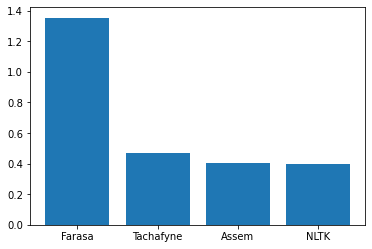

In [59]:
plt.bar(['Farasa','Tachafyne','Assem','NLTK'],np.power(t_e,1/8))